# Numerai - A new kind of hedge fund built by a network of data scientists.


Numerai is one of the first Hedge Funds to give data away for free with structure-preserving encryption, to allow open participation by data scientists around the world. The encrypted data provided by Numerai is normally too difficult and expensive for the average Data Scientist to get a hold of. However, any data scientist can now create an anonymous account on their website and download the training data (and tournament data) for free. Data Scientists then use their own predictive models on the data to try and optimise their predictions on the tournament data. 

There is a leaderboard on the website showing the top ranked models/data scientists (as long as they achieve a certain consistency level and logless number). The top ranked data scientists will get paid for their models in the form of cryptocurrency. While the leaderboard provides some competition between users, Numerai is not looking for the 'ultimate model' but instead, all the individual models are contributions to its meta model.

The ease with which data scientists can sign up, the friendly competition the company has created, and the financial rewards available are all there to achieve one main goal: increase the network effects of Numerai, and more specifically, the hedge fund industry:
###### "Nearly all of the most valuable companies throughout history were valuable through their strong network effects...The most valuable hedge fund in the 21st century will be the first hedge fund to bring network effects to capital allocation."

Since its inception 18 months ago, Numerai has grown exponentially. Although the company's fund performance and holdings remains secretive, the number of models and submissions it has received suggests it has achieved some network effects. 
    - In its first month, Numerai users uploaded 10,292 prediction sets — a total of 200,098,002 equity price predictions.
    - Today, according to its website, the company now has 886,000 models submitted, and a total of 46.5 billion individual predictions. 

An example of one trade that was done as a result of a data scientist's model: 

On February 27th 2016, an anonymous Data Scientist named NCVSAI joined Numerai. He trained a machine learning model, and began submitting stock predictions to Numerai. In early May, NCVSAI uploads a set of global equity price predictions from his model. At this time, NCVSAI had the most accurate model on Numerai. His strongest prediction: buy Salmar ASA — a Norwegian salmon company. Numerai’s hedge fund goes long Salmar ASA and made 26% in one month. 

Typical schedule of events for a new member:
    1. Sign up on https://numer.ai/ needing only your email address.
    2. Every 2 weeks Numerai releases a new set of data to its Data Science community
    3. There are two different sets of encrypted datasets that the DS downloads: the training data, and the tournament data. 
    4. Each DS, under anonymity, models and analyses the data. 
    5. The DS will then send back their predictions based on the data including a logloss score
    6. One week after submission, the DS is notified on how well your predictions performed and whether you will receive any monetary reward in the form of cryptocurrency. 
    
#### Numerai Summary  
    • Data is encrypted
    • Homomorphic encryption schemes – data structure is preserved after cryptography
    • Releases expensive data that most people would not otherwise have access to
    • Difficult, if not impossible, for you to trade using this data
    • Conversely, your algorithms are not disclosed to Numerai
    • You maintain all ownership and IP, only your predictions are submitted
    • Participants paid in Cryptocurrency based on the accuracy of their guesses, currently the top 60 or so receive a payout
    • “Originality” receives an extra bonus, no information on how this is determined (people will try to game it)

In [77]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from scipy import stats
import statsmodels.api as sm
from sklearn import datasets, metrics, linear_model, feature_selection, preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score



## We begin our analysis by using the Training dataset provided. We do an efficient EDA process before modelling. 

###### The Datasets are released every 2 weeks. For this project we will be using "Dataset 44" - released in March 2017. 

In [6]:
training_data = pd.read_csv('/Users/jp/DSI/Capstone/tournament 44/numerai_training_data.csv')


In [7]:
print training_data.shape

(154590, 51)


In [8]:
training_data.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
feature35    0
feature36    0
feature37    0
feature38    0
feature39    0
feature40    0
feature41    0
feature42    0
feature43    0
feature44    0
feature45    0
feature46    0
feature47    0
feature48    0
feature49    0
feature50    0
target       0
dtype: int64

(There are no null values)

In [9]:
training_data.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,target
count,154590.000000,154590.000000,154590.000000,154590.000000,154590.000000,154590.000000,154590.000000,154590.000000,154590.000000,154590.000000,...,154590.000000,154590.000000,154590.000000,154590.000000,154590.000000,154590.000000,154590.000000,154590.000000,154590.000000,154590.000000
mean,0.478294,0.476526,0.500999,0.475484,0.500958,0.501221,0.491995,0.505129,0.501375,0.519864,...,0.470909,0.508125,0.514216,0.529347,0.499170,0.486765,0.517329,0.523318,0.497905,0.500000
std,0.157095,0.123368,0.123540,0.154693,0.149872,0.173157,0.141479,0.137477,0.175497,0.154657,...,0.123511,0.171966,0.128383,0.138047,0.167838,0.148882,0.139038,0.115425,0.150144,0.500002
min,0.000000,0.000000,0.000000,0.012703,0.000000,0.005585,0.007054,0.000000,0.003751,0.000000,...,0.000000,0.000000,0.000000,0.068782,0.000318,0.000000,0.000000,0.000000,0.016648,0.000000
25%,0.361776,0.390634,0.415782,0.356826,0.388054,0.375580,0.389713,0.406789,0.370777,0.407346,...,0.386400,0.385714,0.426747,0.429371,0.376989,0.380547,0.417359,0.445643,0.393765,0.000000
50%,0.475544,0.474176,0.502199,0.474957,0.498965,0.502002,0.492147,0.505223,0.504464,0.518148,...,0.469697,0.510579,0.516279,0.530655,0.500633,0.487344,0.517680,0.524450,0.495189,0.500000
75%,0.592230,0.560374,0.587022,0.595041,0.613519,0.626795,0.593989,0.603770,0.632452,0.633261,...,0.555114,0.632785,0.603954,0.630788,0.622424,0.594643,0.617761,0.602741,0.601751,1.000000
max,1.000000,1.000000,1.000000,0.976940,1.000000,1.000000,1.000000,1.000000,0.986059,1.000000,...,1.000000,1.000000,0.982282,1.000000,0.994126,0.952434,0.998102,1.000000,1.000000,1.000000


In [10]:
training_data.head(5)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,target
0,0.669983,0.606707,0.469412,0.595271,0.741713,0.417073,0.561430,0.324653,0.704061,0.502624,...,0.519823,0.478994,0.736728,0.369075,0.479936,0.397671,0.720823,0.702201,0.602597,0.0
1,0.423738,0.490330,0.657167,0.736777,0.691753,0.436127,0.300617,0.489396,0.306399,0.535077,...,0.440106,0.426703,0.574189,0.346468,0.343980,0.474260,0.428665,0.335968,0.730946,1.0
2,0.534508,0.400015,0.639162,0.291071,0.558840,0.329052,0.537307,0.626506,0.654038,0.597836,...,0.385293,0.559012,0.337409,0.468161,0.611827,0.664968,0.507076,0.510771,0.453142,0.0
3,0.319360,0.517777,0.678197,0.401231,0.532407,0.675572,0.258192,0.512199,0.665457,0.360911,...,0.517044,0.662995,0.498866,0.367217,0.647416,0.687651,0.432818,0.431098,0.511964,0.0
4,0.430825,0.566239,0.547052,0.403674,0.432194,0.559786,0.397768,0.781507,0.622683,0.540712,...,0.364794,0.540689,0.537306,0.352633,0.542871,0.664388,0.627091,0.397574,0.595706,0.0


# Data Description   
   - The training data has 154,590 entries (rows). There are 50 features (columns) per entry, and there is a "target" column. We use this dataset to train the machine learning algorithm. 
   - Each feature represents an encrypted piece of information regarding the particular entry. However, we are never told what that information is - therefore, this dataset ensures that there is no bias towards certain features and that it is purely a mathematical problem. 
   - The final column, 'target' is the binary class we are trying to predict. 

In [11]:
training_data.target.value_counts()

1.0    77295
0.0    77295
Name: target, dtype: int64

The mean for target variable is exactly 0.5 with half of the values being equal to 1, and the other half to 0.


Numerai wants to provide Data Scientists with datasets as clean as possible so that their focus is purely on the mathematical problem ahead. Therefore, there is little data cleaning process involved. The data is already standardised, there are no null values, and they're neatly organized.

## Data Analysis

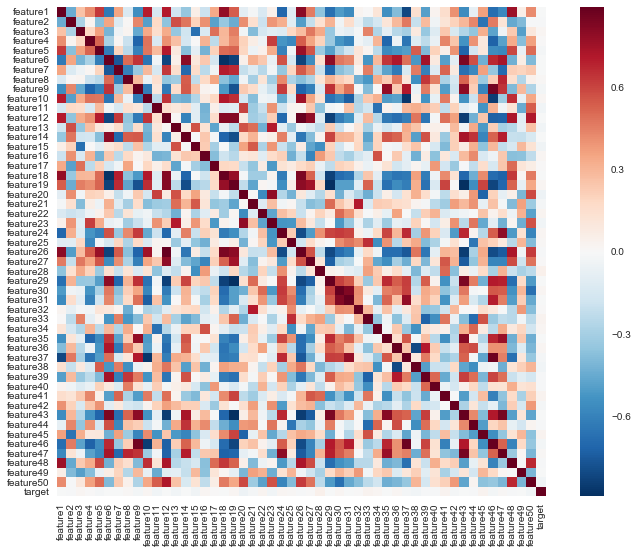

In [12]:
ax = plt.subplots(figsize=(12, 9))
sns.heatmap(training_data.corr(), vmax = 0.75 , square=True)
plt.show()



There is some correlation (both strongly positive and negative) between features, however as we can see from the last column - there is no correlation (0) between any of the features and the target variable. 

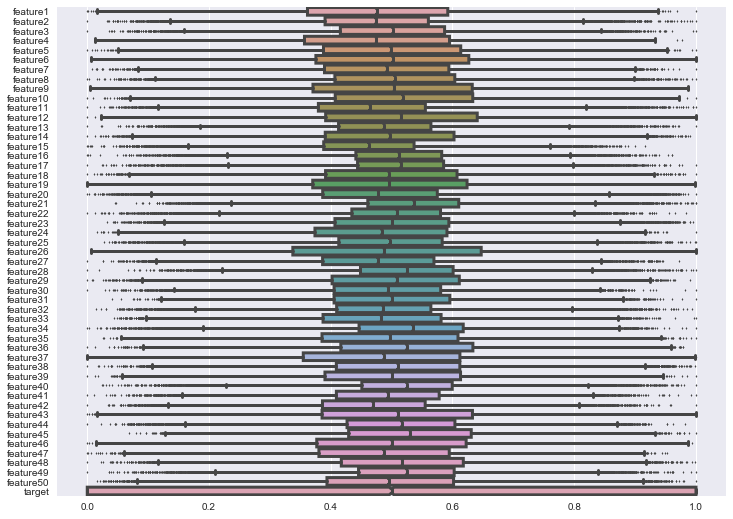

In [13]:
ax = plt.subplots(figsize=(12, 9))
sns.boxplot(data=training_data, orient='h',
            fliersize=2, linewidth=3, notch=True, 
            saturation=0.5)

plt.show()

 - The greatures all have means and medians close to 0.5, with most having a min or max at 0 or 1

In [14]:
print "Mean 1:" , training_data['feature1'].mean()
print "Median 1:" , training_data['feature1'].median()
print " "
print "Mean 2:" , training_data['feature2'].mean()
print "Median 2:" , training_data['feature2'].median()
print " "
print "Mean 3:" , training_data['feature3'].mean()
print "Median 3:" , training_data['feature3'].median()
print " "
print "Mean 4:" , training_data['feature4'].mean()
print "Median 4:" , training_data['feature4'].median()
print " "
print "Mean 5:" , training_data['feature5'].mean()
print "Median 5:" , training_data['feature5'].median()
print " "
print "Mean 6:" , training_data['feature6'].mean()
print "Median 6:" , training_data['feature6'].median()

print"..."

Mean 1: 0.478293957552
Median 1: 0.475544
 
Mean 2: 0.476526381933
Median 2: 0.4741755
 
Mean 3: 0.500998685614
Median 3: 0.5021995
 
Mean 4: 0.475484127841
Median 4: 0.4749575
 
Mean 5: 0.500957964577
Median 5: 0.498965
 
Mean 6: 0.501221499347
Median 6: 0.502002
...


The Mean & Median are approximately equal to each other.

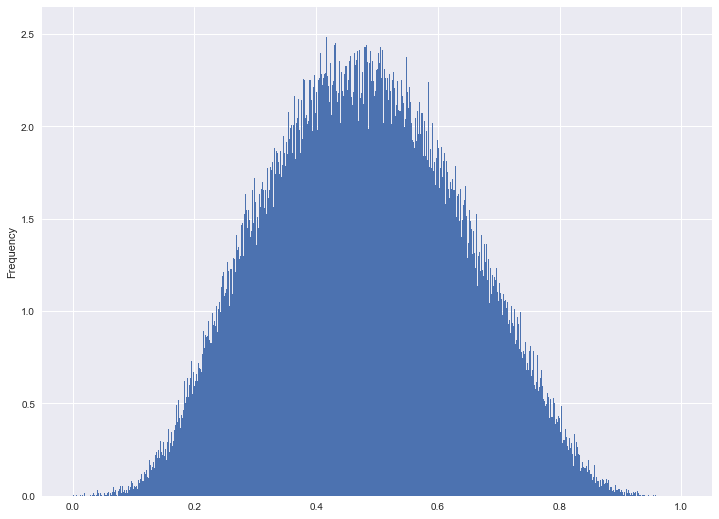

In [15]:
ax = plt.subplots(figsize=(12, 9))
training_data['feature1'].plot(kind='hist', normed=True, bins=1000)

plt.show()

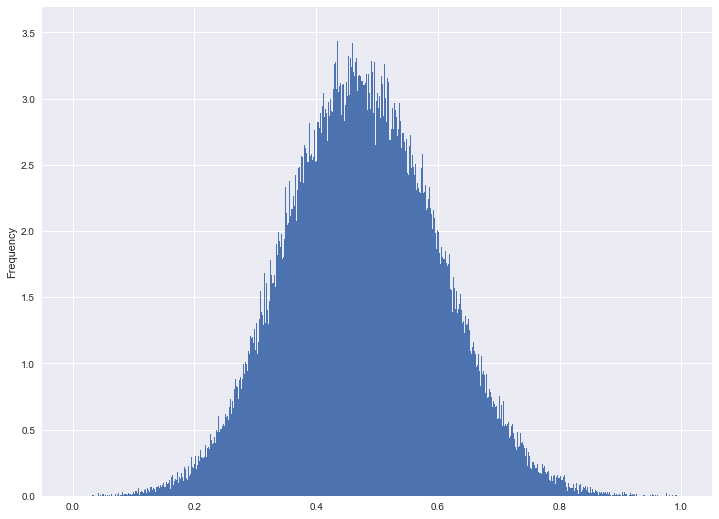

In [16]:
ax = plt.subplots(figsize=(12, 9))
training_data['feature2'].plot(kind='hist', normed=True, bins=1000)

plt.show()

# Modelling

- We first want to create X and y variables
- The Y (target) variable is the "target" variable. It is evenly split between 0 and 1. 

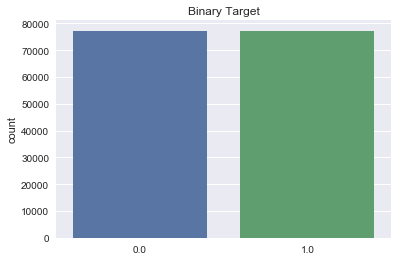

In [17]:
plt.figure(figsize = (6, 4))
sns.countplot(x="target", data=training_data)
plt.xlabel("")
plt.title("Binary Target")
plt.show()

In [18]:
y = training_data['target']

In [19]:
X = training_data.drop([ 'target'], axis = 1)

In [20]:
training_data.target.mean()

0.5

In [21]:
#Given equal value counts, our baseline accuracy will be the mean
print "Baseline accuracy:", training_data.target.mean()

Baseline accuracy: 0.5


Once we have our X and y variables, we next want to split the data into test and train sets. 
 1. The major purpose of validation is to avoid overfitting. Overfitting occurs when a machine learning algorithm, such as a classifier, identifies not only the signal in a dataset, but the noise as well. 
 2. Noise here means the model is too sensitive to features of the dataset that don’t really mean anything. The practical outcome of overfitting is that a classifier which appears to perform well on its training data may perform poorly, possibly very badly, on new data from the same problem.

To develop our classifier, we split our dataset into two using 70 percent of the data to train the algorithm. We then run the classifier on the remaining 30 percent, so far unseen, and record these results. 

In [22]:
# splitting my arrays in ratio of 30:70 percent
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

- "train_test_split" takes an array of our training data which includes the features train excluding our target value, followed by an array of our target value.

- "test_size" is our 30 percent ratio of the data.

- "random_state" takes an integer value of a pseudo-random number generator state used for random sampling.

## Logistic Regression

-The next step is to use the train/test data and run a simple Logistic Regression

In [46]:
Xs = StandardScaler().fit_transform(X) 
#already scale, wouldnt fit_transform again. usually you would, but in this case data is already standardised

scores = cross_val_score(LogisticRegression(), Xs, y, cv=10)
print scores
print np.mean(scores)

[ 0.51862872  0.52199224  0.52166882  0.52380336  0.51901682  0.51740199
  0.5249062   0.52121879  0.52542373  0.51992496]
0.521398562428


- Cross-validation is primarily a way of measuring the predictive performance of a statistical model to an independent data set.

#### Feature importance

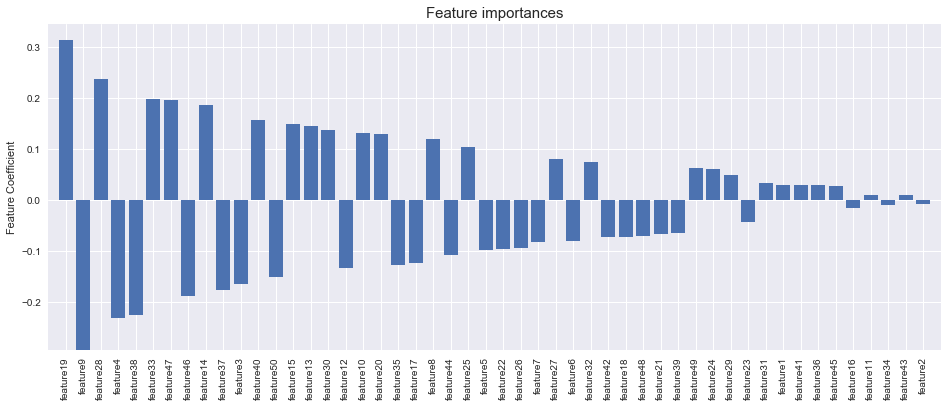

In [47]:
lg = LogisticRegression(C=1000)
lg.fit(X, y) # Fit model to look at model coefficients 

importances = lg.coef_ # feature importance
indices = np.argsort(np.absolute(importances))# sort importance

# Plot the feature importances
plt.figure(figsize = (16, 6))
plt.title("Feature importances", fontsize = 15)
plt.bar(np.arange(0,X.shape[1]), importances[0][indices][0][::-1], align="center")
plt.ylabel('Feature Coefficient')
plt.xticks(np.arange(X.shape[1]), X.columns[indices][0][::-1], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Features 19, 28 & 33 are the most relevant with target being 1 (a 'buy' recomendation) while features 9, 38 and 4 are least relevant to being 1 (and therefore 0, 'not buy'). 

In [48]:
#Cross-validated score
y_hat_CV = cross_val_predict(lg, X_test, y_test, cv=5)
CV_score = np.mean(cross_val_score(lg, X_test, y_test, cv=5))
print 'Cross-validated accuracy score:', CV_score

Cross-validated accuracy score: 0.522910463143


In [49]:
#Accuracy score for test set
y_hat = lg.predict(X_test)
score = accuracy_score(y_test, y_hat)
print 'Accuracy score:', score

Accuracy score: 0.521120382948


The CV and Accuracy scores are similar, and higher than the baseline model (0.5). 

In [50]:
print "Classification report:"  
print classification_report(y_test, y_hat_CV)

Classification report:
             precision    recall  f1-score   support

        0.0       0.52      0.53      0.53     23251
        1.0       0.52      0.52      0.52     23126

avg / total       0.52      0.52      0.52     46377



In [51]:
cnf_matrix = (confusion_matrix(y_test, y_hat_CV))

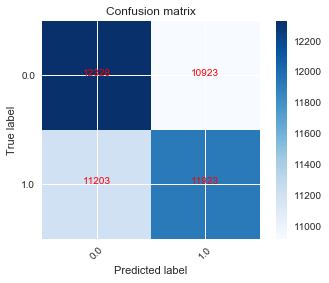

In [52]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(cnf_matrix, classes=lg.classes_)

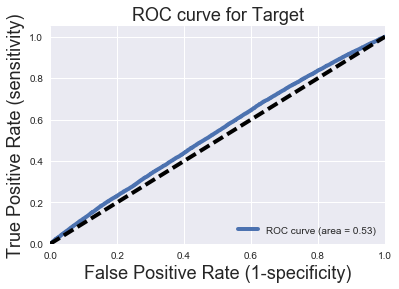

In [53]:
Y_score = lg.decision_function(X_test)
FPR, TPR, THR = roc_curve(y_test, Y_score)
ROC_AUC = auc(FPR, TPR)

plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % ROC_AUC, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-specificity)', fontsize=18)
plt.ylabel('True Positive Rate (sensitivity)', fontsize=18)
plt.title('ROC curve for Target', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [54]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 20)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring= 'accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid(color='w')

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

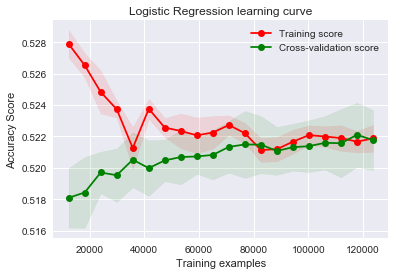

In [28]:
plot_learning_curve(lg, title = "Logistic Regression learning curve", X=X, y=y, cv=5)
plt.show()

# KNN

In [29]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
y_hat_knn = knn.predict(X_test)
score = accuracy_score(y_test, y_hat_knn)
print 'Accuracy score:', score
#Accuracy score for test set

Accuracy score: 0.636242102766


In [31]:
#Cross-validated score
y_hat_CV_knn = cross_val_predict(knn, X_test, y_test, cv=5)
CV_score_knn = np.mean(cross_val_score(knn, X_test, y_test, cv=5))
print 'Cross-validated accuracy score:', CV_score_knn

Cross-validated accuracy score: 0.558509904941


In [32]:
print "Classification report:"
print classification_report(y_test, y_hat_CV_knn)

Classification report:
             precision    recall  f1-score   support

        0.0       0.56      0.56      0.56     23251
        1.0       0.56      0.56      0.56     23126

avg / total       0.56      0.56      0.56     46377



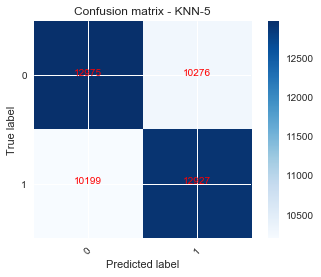

In [33]:
conf_matrix_knn5 = (confusion_matrix(y_test, y_hat_CV_knn))
plot_confusion_matrix(conf_matrix_knn5, [0,1], "Confusion matrix - KNN-5", cmap=plt.cm.Blues)

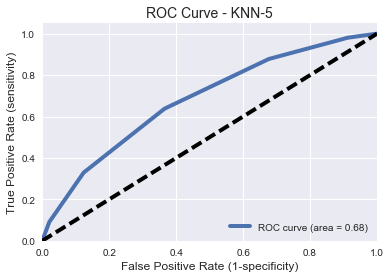

In [34]:
#Plotting ROC for KNN-5
probs = knn.predict_proba(X_test)
Y_score_knn5 = probs[:,1]

FPR, TPR, THR = roc_curve(y_test, Y_score_knn5)
ROC_AUC = auc(FPR, TPR)

plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % ROC_AUC, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-specificity)', fontsize=12)
plt.ylabel('True Positive Rate (sensitivity)', fontsize=12)
plt.title("ROC Curve - KNN-5", fontsize=14)
plt.legend(loc="lower right")
plt.show()

_________________

# Random Forest

In [45]:
rfc= RandomForestClassifier(n_estimators=25, random_state=0).fit(X_train, y_train)

In [46]:
y_hat_rf = rfc.predict(X_test)
rf_proba = rfc.predict_proba(X_test)

In [47]:
score = accuracy_score(y_test, y_hat_rf)
print 'Accuracy score:', score

Accuracy score: 0.570498307351


In [48]:
#Cross-validated score
y_hat_CV_rf = cross_val_predict(rfc, X_test, y_test, cv=5)
CV_score_rf = np.mean(cross_val_score(rfc, X_test, y_test, cv=5))
print 'Cross-validated accuracy score:', CV_score_rf
print 'Classification report'
print(classification_report(y_test,y_hat_CV_rf))

Cross-validated accuracy score: 0.534920238342
Classification report
             precision    recall  f1-score   support

        0.0       0.53      0.53      0.53     23078
        1.0       0.54      0.54      0.54     23299

avg / total       0.53      0.53      0.53     46377



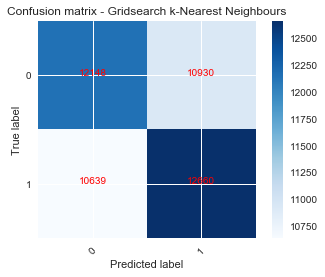

In [49]:
conf_matrix_cv_rf = (confusion_matrix(y_test, y_hat_CV_rf))
plot_confusion_matrix(conf_matrix_cv_rf, [0,1], "Confusion matrix - Gridsearch k-Nearest Neighbours", cmap=plt.cm.Blues)

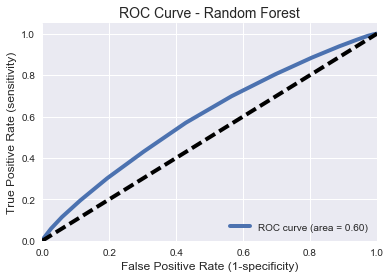

In [50]:
#Plotting ROC for RF
probs_rf = rf_proba
Y_score_rf = probs_rf[:,1]

FPR, TPR, THR = roc_curve(y_test, Y_score_rf)
ROC_AUC = auc(FPR, TPR)

plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % ROC_AUC, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-specificity)', fontsize=12)
plt.ylabel('True Positive Rate (sensitivity)', fontsize=12)
plt.title("ROC Curve - Random Forest", fontsize=14)
plt.legend(loc="lower right")
plt.show()

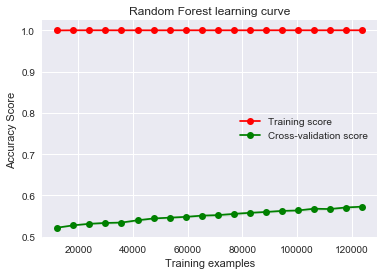

In [51]:
plot_learning_curve(rfc, title = "Random Forest learning curve", X=X, y=y, cv=5)
plt.show()

In [66]:
Model_Results = pd.DataFrame(columns=('Model', 'Accuracy', 'Precision', 'Recall'))
Model_Results.loc[Model_Results.shape[0]] = ['Logit Regression CV', 0.5229, 0.52, 0.52]
Model_Results.loc[Model_Results.shape[0]] = ['KNN-5 CV', 0.5585, 0.56, 0.56]
Model_Results.loc[Model_Results.shape[0]] = ['Random Forest CV', 0.5349, 0.54, 0.54]
Model_Results

,Model,Accuracy,Precision,Recall
0,Logit Regression CV,0.5229,0.52,0.52
1,KNN-5 CV,0.5585,0.56,0.56
2,Random Forest CV,0.5349,0.54,0.54


The above table shows a summary of results for the default KNN, Logit Regression and Random Forest models. While the accuracy results for the models remain low, they are higher than the baseline value. Therefore, applying the models leads to a slight improvement in the predictions. 

## Random Forest GridSearch

- Having used all three different models above, the next step would be to optimize the hyperparameters for each model. 
- Hyperparameter optimization is a technique where the algorithm parameters are referred to as hyperparameters whereas the coefficients found by the machine learning algorithm itself are referred to as parameters.
- We use the search strategy, Gridsearch, to find a good and robust set of parameters for the model. 
    - Grid search means you have a set of models (which differ from each other in their parameter values, which lie on a grid). 
    - What you do is you then train each of the models and evaluate it using cross-validation. You then select the one that performed best.

In [53]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.grid_search import GridSearchCV as GS
# setting the range of values for our parameters
parameters = {
       'n_estimators': [ 20,25 ],
       'random_state': [ 0 ],
       'max_features': [ 2 ],
       'min_samples_leaf': [150,200,250]
}
# implementing my classifier
model = RFC()
grid = GS(estimator=model, param_grid=parameters)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 25], 'max_features': [2], 'random_state': [0], 'min_samples_leaf': [150, 200, 250]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In this example, we are using a random forest classifier, to find different values for n_estimators, max_features, min_samples_leaf, etc. 
This particular gridsearch uses the following parameters: 
- (n_estimators, min_samples_leaf ): ([15,20, 25],[150,180,200]). 

Grid-search would basically train a RandomForestClassifier for each of these 3 pair of (n_estimators, min_samples_leaf ) values, then evaluate it using cross-validation, and select the one that did best.

In [54]:
y_hat_grid_ref = grid.predict(X_test)

In [55]:
probs_rf = grid.predict_proba(X_test)

In [56]:
accuracy = accuracy_score(y_test, y_hat_grid_ref, normalize=True,sample_weight=None)
print 'Accuracy score:', accuracy

Accuracy score: 0.53405783039


In [57]:
print 'Classification report'
print(classification_report(y_test,y_hat_grid_ref))

Classification report
             precision    recall  f1-score   support

        0.0       0.53      0.55      0.54     23078
        1.0       0.54      0.52      0.53     23299

avg / total       0.53      0.53      0.53     46377



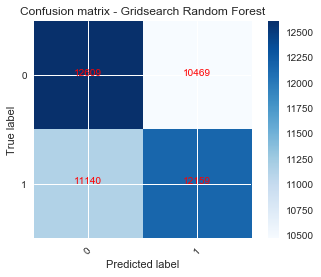

In [58]:
conf_matrix_grid_rf = (confusion_matrix(y_test, y_hat_grid_ref))
plot_confusion_matrix(conf_matrix_grid_rf, [0,1], "Confusion matrix - Gridsearch Random Forest", cmap=plt.cm.Blues)

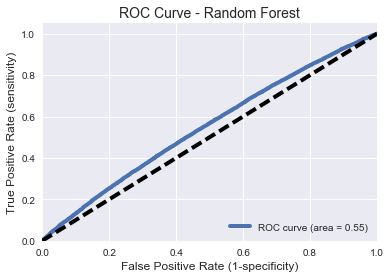

In [61]:
probs_rf = grid.predict_proba(X_test)
Y_score_rf = probs_rf[:,1]

FPR, TPR, THR = roc_curve(y_test, Y_score_rf)
ROC_AUC = auc(FPR, TPR)

plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % ROC_AUC, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-specificity)', fontsize=12)
plt.ylabel('True Positive Rate (sensitivity)', fontsize=12)
plt.title("ROC Curve - Random Forest", fontsize=14)
plt.legend(loc="lower right")
plt.show()

# KNN GridSearch

Given the Random Forest's gridsearch results, and the fact that KNN had the most optimal predictive values out of the default models (0.55 vs 0.52 and 0.53), my final model will be a KNN GridSearch.  

In [33]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.grid_search import GridSearchCV as GS

In [34]:
knn_parameters = {'n_neighbors':range(1,10),'weights': ['uniform', 'distance']}

In [35]:
knngrid = GS(KNeighborsClassifier(), param_grid = knn_parameters, verbose=True, cv=5, scoring='accuracy', n_jobs=4)
knngrid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 138.9min
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed: 194.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy',
       verbose=True)

In [36]:
y_hat_gr_knn = knngrid.predict(X_test)
score = accuracy_score(y_test, y_hat_gr_knn)
print 'Accuracy score:', score

Accuracy score: 0.69308062186


In [39]:
prob_predictions_test = knngrid.predict_proba(X_test)

In [40]:
print "Classification report:"
print classification_report(y_test, y_hat_gr_knn)

Classification report:
             precision    recall  f1-score   support

        0.0       0.69      0.69      0.69     23251
        1.0       0.69      0.69      0.69     23126

avg / total       0.69      0.69      0.69     46377



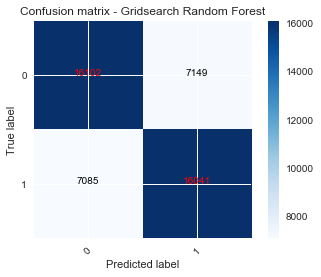

In [55]:
conf_matrix_grid_knnGS = (confusion_matrix(y_test, y_hat_gr_knn))
plot_confusion_matrix(conf_matrix_grid_knnGS, [0,1], "Confusion matrix - Gridsearch Random Forest", cmap=plt.cm.Blues)

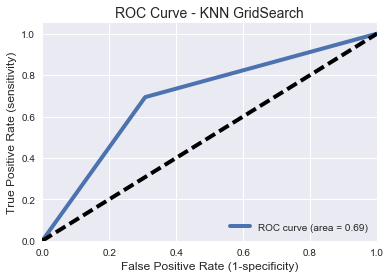

In [56]:
y_score_knnGS = prob_predictions_test[:,1]

FPR, TPR, THR = roc_curve(y_test, y_score_knnGS)
ROC_AUC = auc(FPR, TPR)

plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % ROC_AUC, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-specificity)', fontsize=12)
plt.ylabel('True Positive Rate (sensitivity)', fontsize=12)
plt.title("ROC Curve - KNN GridSearch", fontsize=14)
plt.legend(loc="lower right")
plt.show()

Given the additional results with the KNN and RF Gridsearch, our updated table for accuracy looks like the following:

In [57]:
Model_Results = pd.DataFrame(columns=('Model', 'Accuracy', 'Precision', 'Recall'))
Model_Results.loc[Model_Results.shape[0]] = ['Logit Regression CV', 0.5229, 0.52, 0.52]
Model_Results.loc[Model_Results.shape[0]] = ['KNN-5 CV', 0.5585, 0.56, 0.56]
Model_Results.loc[Model_Results.shape[0]] = ['Random Forest CV', 0.5349, 0.54, 0.54]
Model_Results.loc[Model_Results.shape[0]] = ['Random Forest GridSearch', 0.534, 0.53, 0.53]
Model_Results.loc[Model_Results.shape[0]] = ['KNN GridSearch', 0.693, 0.69, 0.69]
Model_Results

,Model,Accuracy,Precision,Recall
0,Logit Regression CV,0.5229,0.52,0.52
1,KNN-5 CV,0.5585,0.56,0.56
2,Random Forest CV,0.5349,0.54,0.54
3,Random Forest GridSearch,0.5340,0.53,0.53
4,KNN GridSearch,0.6930,0.69,0.69


As shown in our results, the RF gridsearch did very little in improving the default's accuracy value, while precision and recall both decreased. KNN, the best performing default model, had quite a significant improvement when using Gridsearch. 

Given the KNN GS model has the most optimal prediction value, we will use it on Numerai's tournament data. In order to submit we also need to calculate the logloss score.

In [61]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, prob_predictions_test)
print 'logloss', logloss

logloss 10.6006197728


In [62]:
tournament_data = pd.read_csv('/Users/jp/DSI/Capstone/tournament 44/numerai_tournament_data.csv')

In [65]:
tournament_data.head()

,t_id,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50
0,120343,0.527396,0.389264,0.248415,0.391827,0.615901,0.575447,0.526073,0.391853,0.630488,...,0.288244,0.545858,0.465975,0.525572,0.509174,0.666237,0.328988,0.551777,0.834982,0.466029
1,158751,0.347771,0.494118,0.380688,0.377086,0.341614,0.543619,0.516503,0.566225,0.545643,...,0.509841,0.305048,0.534322,0.418551,0.531436,0.499126,0.562278,0.407548,0.635160,0.342811
2,75407,0.285406,0.496860,0.393405,0.518879,0.334936,0.845866,0.314618,0.441339,0.577873,...,0.372865,0.402093,0.669767,0.687561,0.581636,0.599819,0.548851,0.439338,0.563476,0.362535
3,132303,0.567917,0.295597,0.594209,0.535265,0.328880,0.605461,0.290615,0.651410,0.292327,...,0.437614,0.520127,0.573773,0.538756,0.621855,0.373368,0.583633,0.430534,0.411451,0.460545
4,125953,0.774468,0.399277,0.470438,0.446111,0.621730,0.333230,0.672829,0.462825,0.485715,...,0.434219,0.672102,0.323146,0.445824,0.496894,0.440741,0.385280,0.730263,0.586374,0.662282


In [98]:
# We now want to predict class probabilities for the tournament data set, we do this using the following formula:
prob_predictions_tourney = knngrid.predict_proba(tournament_data.iloc[:,1:51]) 

In [71]:
tournament_data.head()

,t_id,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50
0,120343,0.527396,0.389264,0.248415,0.391827,0.615901,0.575447,0.526073,0.391853,0.630488,...,0.288244,0.545858,0.465975,0.525572,0.509174,0.666237,0.328988,0.551777,0.834982,0.466029
1,158751,0.347771,0.494118,0.380688,0.377086,0.341614,0.543619,0.516503,0.566225,0.545643,...,0.509841,0.305048,0.534322,0.418551,0.531436,0.499126,0.562278,0.407548,0.635160,0.342811
2,75407,0.285406,0.496860,0.393405,0.518879,0.334936,0.845866,0.314618,0.441339,0.577873,...,0.372865,0.402093,0.669767,0.687561,0.581636,0.599819,0.548851,0.439338,0.563476,0.362535
3,132303,0.567917,0.295597,0.594209,0.535265,0.328880,0.605461,0.290615,0.651410,0.292327,...,0.437614,0.520127,0.573773,0.538756,0.621855,0.373368,0.583633,0.430534,0.411451,0.460545
4,125953,0.774468,0.399277,0.470438,0.446111,0.621730,0.333230,0.672829,0.462825,0.485715,...,0.434219,0.672102,0.323146,0.445824,0.496894,0.440741,0.385280,0.730263,0.586374,0.662282


In [72]:
# We then extract the prediction of each line:
probability_class_of_one = np.array([x[1] for x in prob_predictions_tourney[:]]) # List comprehension
t_id = tournament_data['t_id']

In [73]:
#Finally, we can create two excel spreadsheets in a folder above:
np.savetxt(
    '../probability.csv',          # file name
    probability_class_of_one,  # array to savela
    fmt='%.2f',               # formatting, 2 digits in this case
    delimiter=',',          # column delimiter
    newline='\n',           # new line character
    header= 'probability')   # file header

np.savetxt(
    '../t_id.csv',          # file name
    t_id,                   # array to save
    fmt='%.d',              # formatting, 2 digits in this case
    delimiter=',',          # column delimiter
    newline='\n',           # new line character
    header= 't_id')   # file header

In [79]:
df_probability = pd.read_csv("/Users/jp/DSI/probability.csv")

df_tradeID = pd.read_csv("/Users/jp/DSI/t_id.csv")


In [93]:
df_tradeID.head(5)

,# t_id
0,120343
1,158751
2,75407
3,132303
4,125953


In [94]:
df_probability.head(5)

,# probability
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0


In [95]:
df = pd.concat([df_tradeID, df_probability], axis=1, join_axes=[df_tradeID.index])

In [96]:
df.head()

,# t_id,# probability
0,120343,0.0
1,158751,0.0
2,75407,0.0
3,132303,0.0
4,125953,1.0


In the above table, we have concatenated both the target prediction and the trade ID for the tournament data. The final step will be to submit this spreadsheet by uploading the CSV file up onto the Numerai website. 

The Data Scientist then waits for 1-2weeks to see if they have made it on the leaderboard. The leaderboard displayed is based only on validation data. To be on the leaderboard, models are required to have concordance, originality, and consistency.

Concordance is a measure of whether predictions on the validation set, test set, and live set appear to be generated by the same model. A data scientist who submits perfect answers on the validation set is unlikely to achieve concordance.

Originality is a measure of whether a set of predictions is uncorrelated with predictions already submitted. Numerai wants to encourage new models over duplicate submissions. Given the simplicity of my algorithim, originality will be low.

Only models with concordance, originality, and consistency control the capital in Numerai’s hedge fund. As such, these are the only models eligible to earn cryptocurrency. Earnings are paid out based on live performance. It takes one month for the market to decide the outcome of predictions. 

Over time, data scientists who regularly achieve concordance, originality, consistency and strong live logloss will also earn bonuses as their reputation grows.

---------------------------------

# Summary 

Given the results, I would choose the KNN GridSearch model to predict the tournament data. It had the highest accuracy score although a low logloss score and therefore would not be eligible on the leaderbaord. 

#### Successes
 - The aim of this notebook was to give a general overview to any Data Scientist looking to enter and play in the Numerai tournament. We succesfully downloaded, analysed and tested the data using various models, choosing the most accurate one (KNN GS) for our final submission. 

 - While all our algorithms improved the predictive value in the data when compared to the baseline accuracy, KNN Gridsearch was by far the most effective one. Therefore, while there was no correlation shown in our heatmap (during the EDA) we were able to achieve a stronger than average accuracy score for the data.
 
 - Assuming the data scientist has the knowledge to take on the tasks, the simplicity in signing up and downloading/predicting the data helps Numerai's underlying thesis "to increase the network effects of capital allocation." Not only have I shared my project with friends and family, but also with an online community in a Slack forum and now with my DS class - spreading the word of Numerai and potentially increasing the number of future model growth. 


#### Setbacks
 - While encrypting the data serves as an attraction to data scientists who approach the problem purely as a numbers game, it is frustrating to not know what truly lies behind each feature. The company hides the data's information in order to prevent bias, but it could also potentially lose DS in the long run as they will lose interest in looking at essentially meaningless data.  
 
 - Given the simplicity of the model of using KNN Gridsearch, I believe many other of the data scientists subscribed to Numerai would have already submitted a similar model. Therefore, one of the main setbacks is that my model would score low in terms of 'originality.'
 
 - Moreover, because the data is available to the whole DS community, I believe there are other DS who have significant computing power in order to run more complex models in shorter time.

#### Next Steps
 - This notebook has only used 5 models to analyse the data - the natural next steps would be to also use SVM, and Logistic regression gridsearch. 


 - We could look deeper into the data and re-model it hundreds of times using different combinations of features: there are endless opportunities in terms of how we could test to see if we can increase our accuracy score. For example, we could split the data and only use the first 10 features, or from the features importance chart we could only use Features 19, 28 and 33 as they are most relevant to target being 1. 